# NLP Project
Quora Question Pairs


Input the dataset:
There have two dataset train data and test data.

In [8]:
import numpy as np 
import pandas as pd 


train_df = pd.read_csv("train.csv.zip")
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [9]:
test_df = pd.read_csv("test2.csv.zip")
test_df.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


Improt all the libaries that we will need in this project

In [11]:
import torch
import torch.nn as nn

# !pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# !pip install tqdm
from tqdm import tqdm


from sklearn.model_selection import train_test_split

# !pip install -c conda-forge transformers
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
transformers.logging.set_verbosity_error()



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

SEED = 1024

np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

cpu


# Data Analysis

Do some analsis and remove some of the missing values, because the data is text. Then check the length of the data.

<class 'pandas.core.frame.DataFrame'>
Index: 404287 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404287 non-null  int64 
 1   qid1          404287 non-null  int64 
 2   qid2          404287 non-null  int64 
 3   question1     404287 non-null  object
 4   question2     404287 non-null  object
 5   is_duplicate  404287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


<Axes: ylabel='Count'>

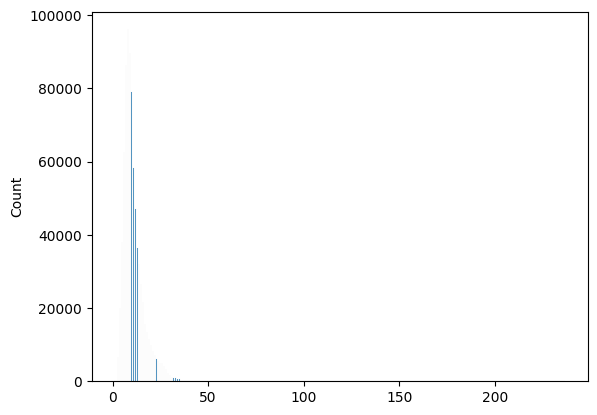

In [13]:
train_df.info()

train_df.dropna(inplace=True)
train_sentences_lens = train_df['question1'].apply(lambda x: len(x.split(' '))).tolist()
train_sentences_lens.extend(train_df['question2'].apply(lambda x: len(x.split(' '))).tolist())
sns.histplot(train_sentences_lens)


From the graph you can see that most the data are all under 50 words in every sentence.

So we can set 50 as the maximun lenth of the sentence.

In [14]:
MaximunLen = 50

Let see how many different questions are in the data

In [23]:
qids = pd.Series(list(train_df['question1']) + list(train_df['question2']))

print ('Unique Questions number: {}\n'.format(len(np.unique(qids))))


Unique Questions number: 537359



Let see the percentage of duplicate and similar in the train data by analysis the duplicate in the train data.

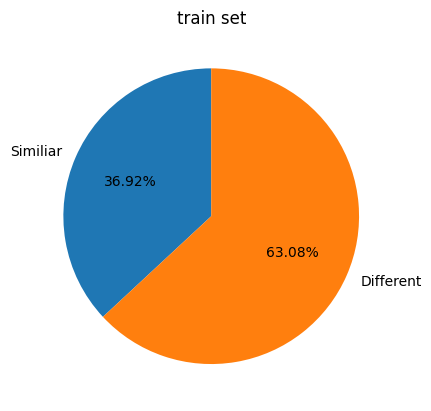

In [22]:
def pie_chart(similar_questions_num, different_questions_num, graph_title):
    labels = 'Similiar', 'Different'
    sizes = [similar_questions_num, different_questions_num]

    fig1, ax1 = plt.subplots()
    ax1.set_title(graph_title)
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)

    plt.show()

similar_samples_num = sum(train_df['is_duplicate'].values)
pie_chart(similar_samples_num, len(train_df['is_duplicate']) - similar_samples_num, 'train set')

Let see if there's any paired quesions that are exacte the same.

In [24]:
duplicate_rows = train_df[train_df.duplicated(['qid1','qid2'])]
print ("Number of duplicate questions : ", len(duplicate_rows))

Number of duplicate questions :  0
